In [2]:
!pip install wordcloud
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import contractions

In [2]:
all_data = pd.read_csv("../data/all-data.csv",encoding='latin-1', header=None)

In [3]:
huggingfaceData1 = pd.read_csv("../data/sent_train.csv")
huggingfaceData2 = pd.read_csv("../data/sent_valid.csv")

In [4]:
huggingfaceData = pd.concat([huggingfaceData1,huggingfaceData2],ignore_index=True)

In [5]:
huggingFaceMapping = {0:-1,1:1,2:0}
huggingfaceData["label"] = huggingfaceData["label"].map(huggingFaceMapping)

In [14]:
huggingfaceData = huggingfaceData.rename(columns={'text': 'Sentence', 'label': 'Sentiment'})

In [7]:
"""
Remove tickers
"""
huggingfaceData['text'] = huggingfaceData['text'].str.replace(r'\$[^\s]+', '', regex=True)

In [16]:
all_data = all_data.rename(columns=lambda x: ['Sentiment', 'Sentence'][x])

TypeError: list indices must be integers or slices, not str

In [9]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
all_data['Sentiment'] = all_data['Sentiment'].map(sentiment_mapping)

In [19]:
all_data = pd.concat([all_data,huggingfaceData],ignore_index=True)

EDA

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

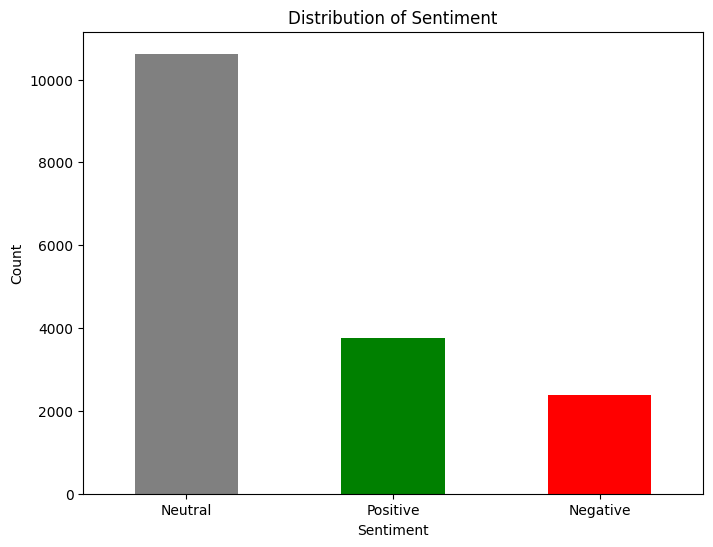

In [22]:
plt.figure(figsize=(8, 6))
all_data['Sentiment'].value_counts().plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[2, 0, 1], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()


Cleaning

In [23]:
from bs4 import BeautifulSoup
import re
import nltk
import tqdm
import unicodedata
import contractions
from nltk.tokenize import word_tokenize

def strip_html_tags(text):
  """
  Removes html tags from text taken for html pages
  """
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  """
  Removes accents from chars
  """
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    """
    Remvoves stopwords (english language) from the text
    """
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [24]:
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/adam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/adam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
all_data['Clean sentences'] = pre_process_corpus(all_data["Sentence"])

  0%|          | 0/16777 [00:00<?, ?it/s]

  7%|▋         | 1202/16777 [00:00<00:06, 2509.89it/s]/home/adam/.local/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
 57%|█████▋    | 9497/16777 [00:03<00:02, 2945.29it/s]/home/adam/.local/lib/python3.10/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
100%|██████████| 16777/16777 [00:05<00:00, 2813.42it/s]


In [26]:
all_data

,Sentiment,Sentence,Clean sentences
0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,0,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
2,-1,The international electronic industry company ...,international electronic industry company elco...
3,1,With the new production plant the company woul...,new production plant company would increase ca...
4,1,According to the company 's updated strategy f...,according company updated strategy years 20092...
...,...,...,...
16772,0,Stocks making the biggest moves midday: TD Ame...,stocks making biggest moves midday td ameritra...
16773,0,Stocks making the biggest moves premarket: Fit...,stocks making biggest moves premarket fitbit x...
16774,0,Stocks making the biggest moves premarket: Hom...,stocks making biggest moves premarket home dep...
16775,0,Stocks making the biggest moves premarket: TD ...,stocks making biggest moves premarket td ameri...


Class balancing, upscale the negative sentences

In [27]:
from sklearn.utils import resample

negative_upsample = resample(all_data.loc[all_data["Sentiment"]==-1], 
                                 replace=True,    
                                 n_samples= all_data.loc[all_data["Sentiment"]==0].shape[0],   
                                 random_state=1234)

positive_upsample = resample(all_data.loc[all_data["Sentiment"]==1], 
                                 replace=True,    
                                 n_samples= all_data.loc[all_data["Sentiment"]==0].shape[0],   
                                 random_state=1234)

In [28]:
all_data_final = pd.concat([positive_upsample,negative_upsample,all_data.loc[all_data["Sentiment"]==0]])

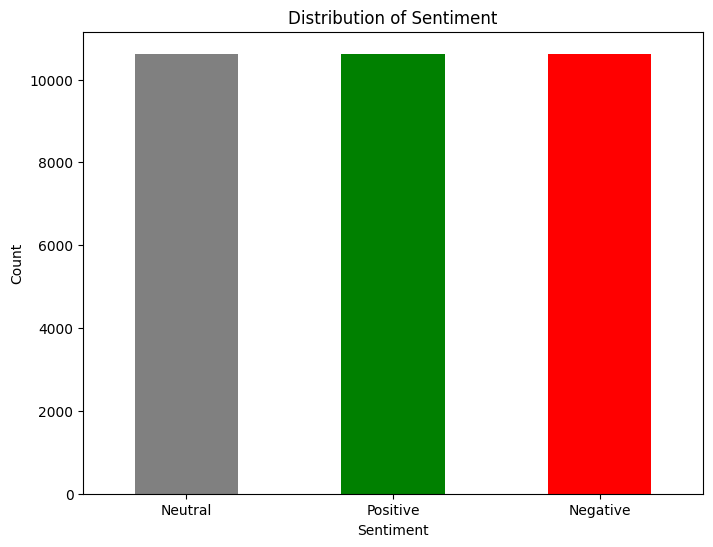

In [29]:
plt.figure(figsize=(8, 6))
all_data_final['Sentiment'].value_counts().plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[2, 0, 1], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()


In [30]:
all_data_final = all_data_final.sample(frac=1, random_state=1234).reset_index(drop=True)

In [31]:
all_data_final.to_csv("all-data-processed-3classes.csv",index_label=False)